# **PRÁCTICA 1:  Machine Learning - Parte 2: Métodos filter y wrapper**
### Universitat de València, Escola Tecnica Superior d'Enginyeria
### Elena Marrero Castellano | 3ª curso del Grado Ciencia de Datos

# Laboratorio

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Selección de caraterísticas mediante métodos *filter*

## Correlación entre las variables de entrada y la de salida


El método consiste en ver qué variables de entrada están más correlacionadas con la salida y escoger aquellas con mayor correlación. Seguimos con el dataset IRIS

In [ ]:
X, y = load_iris(return_X_y=True)

### Ejercicio 1:
Calcula la correlación (`np.corrcoef`) entre las entradas y la salidas. Muestra los valores calculados y selecciona dos de las variables más adecuadas.

In [ ]:
r = np.zeros(X.shape[1]) # Devuelve una nueva matriz de forma y tipo dados, nuestro caso 4, llena de ceros.
for i in range (X.shape[1]):
    r[i] = np.corrcoef( X[:,i], y)[0,1]
print(r)

# Aquí podemos obtener el coeficiente de correlación de las entradas y las salidas:
# [ 0.78256123 -0.42665756  0.9490347   0.95654733]
# Las variables que he seleccionado son 0.9490347   0.95654733 ya que son las variables que se aproximan más a uno.

[ 0.78256123 -0.42665756  0.9490347   0.95654733]


## Correlación entre variables de entrada


En este caso vamos a descartar variables de entrada que estén muy correlacionadas entre sí, puesto que entendemos que no añaden más información al modelo y pueden perjudicar su rendimiento.

Por ejemplo si encontramos que las variables `X[:,0]` y `X[:,1]` (dimensiones 1 y 2) están muy correlacionadas descartaremos una de las dos.


#### Ejercicio 2:
Calcula la correlación entre todas las variables de entrada y descarta alguna con alta correlación cruzada.

In [ ]:
# Mirando solo la correlación entre todas las variables de entrada obtenemos:
correlacion=np.corrcoef((np.array(X[:,0]),
                     np.array(X[:,1]),
                     np.array(X[:,2]),
                     np.array(X[:,3])))

# Aquí podemos obtener el coeficiente de correlación de las entradas en forma de matriz:
#[[ 1.         -0.11756978  0.87175378  0.81794113]
# [-0.11756978  1.         -0.4284401  -0.36612593]
# [ 0.87175378 -0.4284401   1.          0.96286543]
# [ 0.81794113 -0.36612593  0.96286543  1.        ]]

# Las variables que he seleccionado son 0.87175378 y 0.81794113.

#### Ejercicio 3:
Representa gráficamente las relaciones entre variables (puedes usar `plt.imshow`).

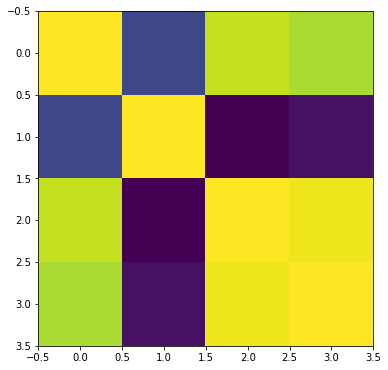

In [ ]:
plt.figure(figsize=(6,18))
plt.imshow(correlacion)

## Información mutua (MI) entre las variables de entrada y salida

En primer lugar vamos a calcular la MI. Por definición sabemos que la MI entre dos variables **discretas** $X,Y$ viene dada por

$$ \textrm{MI}(X,Y) = \sum_{y\in \mathcal{Y}}\sum_{x\in \mathcal{X}} p(x,y)\log\left(\frac{p(x,y)}{p(x)p(y)}\right)$$

Más info: https://en.wikipedia.org/wiki/Mutual_information

En primer lugar estimamos la probabilidad para cada clase de la variable de salida. También podemos calcular su entropía que, viene dada por $ J(y)=-\sum p(y)\log p(y) $.

In [ ]:
# Entropia de las variables /discretas/ de salida: J(y) = -sum P(c)log(P(c))
classes = np.unique(y)

# Probablidad de cada classe
py = np.zeros(len(classes))
for nc, c in enumerate(classes):
    py[c] = np.sum(y == c)
    
# Convertimos en probabilidades normalizando por el total
py /= np.sum(py)

# Calculamos la entropía
jy = np.sum(py * np.log(py))
print('p(y)', py, 'y entropy', jy)

p(y) [0.33333333 0.33333333 0.33333333] y entropy -1.0986122886681096


### Para poder trabajar con las variables de la entrada tendremos que cuantificarlas dado que son continuas.


#### Ejercicio 4:
Utiliza `KBinsDiscretizer` visto en la primera parte para crear una nueva variable `Xd` discretizando la variable `X`. Utiliza 9 bins.

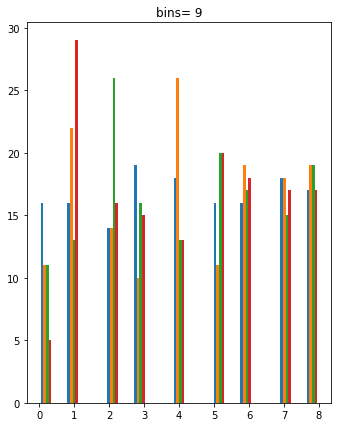

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

Xd = KBinsDiscretizer(n_bins=9, encode='ordinal').fit_transform(X)

plt.figure(figsize=(12,7))
plt.subplot(1,2,1), plt.hist(Xd,21), plt.title('bins= 9');

#### Ejercicio 5:
Completa el siguiente código para estimar p(x) y p(x,y) y así poder calcular la MI entre cada variable de entrada y la salida.
<br>Los trozos de código entre `# --------------` son los que debes rellenar.

In [ ]:
# Vamos a calcular la MI para cada variable en X
nv = Xd.shape[1]
mi = np.zeros(nv)

# Valores distintos en Xd
xvalues = np.unique(Xd)

for v in range(nv):
    # Calculamos px
    px = np.zeros(len(xvalues))
    # (A completar. Fíjate en cómo hemos calculado antes py)
    for nc, c in enumerate(xvalues):
        
        px[nc] = np.sum(Xd == c)
    px /= np.sum(px)
    
    # Calculamos pxy
    pxy = np.zeros((len(xvalues), len(classes)))
    
    # (A completar. Ahora debes tener en cuenta los valores de X e y al mismo tiempo)
    for nc, c in enumerate(classes):
        for ns, a in enumerate(xvalues):
            
            pxy[ns,nc] = np.sum((y == c)*(Xd[:,v]== a))
                                
    pxy /= np.sum(pxy)
    
    # Calculamos MI: sum_x(sum_y( p(x,y) * log(p(x,y) / (p(x)*p(y)) ))
    mi[v] = 0.0
    for i in range(pxy.shape[0]):
        for j in range(pxy.shape[1]):
            # Evitar divisiones por cero y logaritmos = -inf
            if pxy[i,j] > 0 and px[i] > 0 and py[j] > 0:
                mi[v] +=  sum_x(sum_y( p(x,y) * log(p(x,y) / (p(x)*p(y)) )) 

 print(mi)   

SyntaxError: invalid syntax (<ipython-input-38-e1c6a1d9dc40>, line 54)

#### Ejercicio 6:
Compara el resultado obtenido con el de la implementación de scikit learn `sklearn.feature_selection.mutual_info_classif`.

In [ ]:
from sklearn import feature_selection
feature_selection.mutual_info_classif(X,y)

array([0.50925238, 0.25406388, 0.98580356, 0.98489606])

### En sci-kit learn tenemos una función para seleccionar las mejores `k` variables, `SelectKBest`. Esto junto con la función `mutual_info_classif` nos permite seleccionar grupos de variables.

#### Ejercicio 7:
Utiliza `sklearn.feature_selection.SelectKBest` y `mutual_info_classif` para seleccionar automáticamente las dos mejores variables.

In [ ]:
from sklearn.feature_selection import SelectKBest
SelectKBest(feature_selection.mutual_info_classif(X,y),k=20)

SelectKBest(k=20,
            score_func=array([0.47968604, 0.22772845, 0.98478316, 0.9859296 ]))

* Hay otros estadísticos que se pueden usar en problemas de clasificación:
    - `chi2`: estadístico $\chi^2$ (chi cuadrado) entre X, y.
    - `f_classif`: Test ANOVA entre X, y.
- Para problemas de regression podemos usar `mutual_info_regression` o `f_regression`.

## Información Mútua entre variables de entrada


### Igual que con la correlación, entre dos variables con MI alto una de ellas podría descartarse.


#### Ejercicio 8:
Utiliza `mutual_info_regression` entre cada par de variables de entrada para detectar las que contienen información mútua y descarta una de ellas.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mutual_info_regression(X,y)

array([0.50033979, 0.23612522, 0.97718943, 0.93249957])

# Selección de caraterísticas mediante métodos *wrapper*


Los métodos *wrapper* se basan en seleccionar las variables que mejor funcionarán para un determinado modelo. Para ello necesitamos un modelo de clasificación o regresión, e iremos probando todas las combinaciones de variables una a una y en grupos.

Vamos a experimentar con este método con un problema sencillo de regresión donde ajustaremos una recta por mínimos cuadrados. El problema lo generaremos con la función `make_regression` de scikit-learn, asegurándonos de crear un número de variables informativas menor que el número total de variables, tal y como muestra el código a continuación.

Generamos 100 muestras de un problema de regresión con 4 variables de entrada y una de salida. De las 4 variables solo 3 son necesarias para poder predecir. Además añádimos una pequeña cantidad de ruido para complicar un poco el problema.

In [ ]:
from sklearn.datasets import make_regression
# Para que el ejemplo tenga sentido tenemos que poner n_informative < n_features
X, y = make_regression(n_samples=100, n_features=4, n_informative=3, n_targets=1, noise=0.01)

### En la siguiente celda de código hacemos dos cosas:
1. Dividimos el conjunto de `X,y` en entrenamiento (train) y test.
2. Definimos una clase de Python con un modelo sencillo de regresión lineal.

Como os podéis imaginar ya existen modelos así en scikit-learn. El objetivo de definir uno nosotros es doble: 1) para que tengáis un ejemplo de cómo se hace, y 2) para que os familiarizéis con la programación de objetos en Python.

In [ ]:
# Separamos en entrenamiento y test
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33)

# Nos aseguramos de que la variable y tenga dimensión Nx1
ytrain = ytrain.reshape(-1,1)
ytest = ytest.reshape(-1,1)

# Definimos un modelo sencillo de regresión lineal
class myLinearModel:
    def __init__(self):
        self.alphas = None
    
    def add_ones(self, X):
        ones = np.ones((X.shape[0] ,1))
        return np.hstack((X, ones))
    
    def fit(self, X, y):
        # y = X*alphas => pinv(X)*y = alphas
        self.alphas = np.dot(np.linalg.pinv(self.add_ones(X)), y)
        return self.alphas

    # Con esta función predecimos
    def predict(self, X):
        if self.alphas is not None:
            return np.dot(self.add_ones(X), self.alphas)
        else:
            return None

    # Y con esta otra medimos el error
    def score(self, y, yp):
        print('MSE', np.sum((y - yp)**2) / len(y))

# Esto ya existe en sklearn, pero mola más programarlo un mismo!
# from sklearn.linear_model import LinearRegression
# lr = LinearRegression()
# lr.fit(Xtrain, ytrain)
# yp = lr.predict(Xtest)
# print(lr.score(Xtest, ytest))

# Comprobamos que funciona
model = myLinearModel()
model.fit(Xtrain, ytrain)
yp = model.predict(Xtest)
model.score(ytest, yp)
print(model.alphas.T)

MSE 0.00015988410589338776
[[ 7.35436984e+01  7.27509412e+00 -1.64508003e-03  1.58943126e+01
   2.20625961e-03]]


### Vamos ahora con el método de selección de variables propiamente dicho.


#### En primer lugar vamos probando con cada variable una por una ...


##### Ejercicio 9:
Prueba una por una las variables de entrada en nuestro `myLinearModel`. Comprueba los resultados
con las funciones `fit`, `predict` y `score`.

In [ ]:
for i in range(Xtrain.shape[1]):
    # Cada variable esta en Xtrain[:, i, None]
    # Usa fit, predict y score para comprobar el resultado
    model = myLinearModel()
    model.fit(Xtrain[:,i,None],ytrain)
    yp = model.predict(Xtrain[:,i,None]) 
    model.score(ytrain, yp)
    print(model.alphas.T)

MSE 345.29994679208437
[[73.9281123   2.53725325]]
MSE 5378.450901375113
[[-3.76347308  1.72393899]]
MSE 4947.283621286139
[[-22.78018258   7.66689261]]
MSE 4783.2450689660745
[[24.348452 -1.44923 ]]


#### Ahora en grupos de dos ...


##### Ejercicio 10:
Ahora prueba todas las combinaciones de dos variables. Para ello usaremos `combinations` de la librería `itertools`.

In [ ]:
from itertools import combinations
for c in combinations(range(4), 2):
    # Cada combo está en Xtrain[:,c]
    model = myLinearModel()
    model.fit(Xtrain[:,c],ytrain)
    yp = model.predict(Xtrain[:,c])
    model.score(ytrain, yp)
    print(model.alphas.T)    

MSE 247.70782288410592
[[75.89523127 10.3779414   1.58192552]]
MSE 344.64983113957516
[[74.19934652  0.91561113  2.28830388]]
MSE 46.32758241289291
[[72.02459367 17.16206467  0.52263982]]
MSE 4941.705202667163
[[ -2.44155218 -22.62372878   7.85570428]]
MSE 4723.900091481465
[[-8.05279579 25.58397449 -0.82662601]]
MSE 4324.119930340383
[[-23.15489051  24.64225726   4.92113145]]


#### Y por último en grupos de tres ...

In [ ]:
from itertools import combinations
for c in combinations(range(4), 3):
    # Cada combo está en Xtrain[:,c]
    model = myLinearModel()
    model.fit(Xtrain[:,c],ytrain)
    yp = model.predict(Xtrain[:,c])
    model.score(ytrain, yp)
    print(model.alphas.T)

MSE 247.11415104613224
[[76.15386943 10.37500798  0.87496731  1.344297  ]]
MSE 0.0001159557299748622
[[7.35441953e+01 7.27510261e+00 1.58942408e+01 1.76661330e-03]]
MSE 46.3260752036175
[[ 7.20113091e+01 -4.41389347e-02  1.71639502e+01  5.34419601e-01]]
MSE 4282.711043460083
[[ -6.7387271  -22.73871648  25.67088442   5.3276403 ]]
